C:\Users\Venkat Raman\AppData\Local\Temp\ipykernel_24676\1326321164.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Index_Trail=int(Index_Trail)


Pheromone Matrix after initial ant pheromone deposits: [[   0. 3502. 3748. 3738. 3920. 3990. 3996. 3992. 3928. 4306. 3964. 4256.]
 [3502.    0. 4154. 3604. 3822. 3592. 3930. 4130. 4158. 3900. 3866. 3966.]
 [3748. 4154.    0. 3774. 3852. 3470. 3504. 3736. 3676. 3850. 4080. 3816.]
 [3738. 3604. 3774.    0. 3802. 3912. 3890. 3722. 3822. 3688. 3814. 3786.]
 [3920. 3822. 3852. 3802.    0. 3790. 3780. 3680. 3920. 3710. 3396. 3684.]
 [3990. 3592. 3470. 3912. 3790.    0. 3486. 3830. 3446. 3756. 3554. 3418.]
 [3996. 3930. 3504. 3890. 3780. 3486.    0. 3628. 3792. 3574. 3700. 3332.]
 [3992. 4130. 3736. 3722. 3680. 3830. 3628.    0. 3496. 3270. 3504. 3452.]
 [3928. 4158. 3676. 3822. 3920. 3446. 3792. 3496.    0. 3202. 3232. 3376.]
 [4306. 3900. 3850. 3688. 3710. 3756. 3574. 3270. 3202.    0. 3382. 3130.]
 [3964. 3866. 4080. 3814. 3396. 3554. 3700. 3504. 3232. 3382.    0. 3180.]
 [4256. 3966. 3816. 3786. 3684. 3418. 3332. 3452. 3376. 3130. 3180.    0.]] 

Initial ants : 

{1: [1, 5, 6, 7, 10, 12],

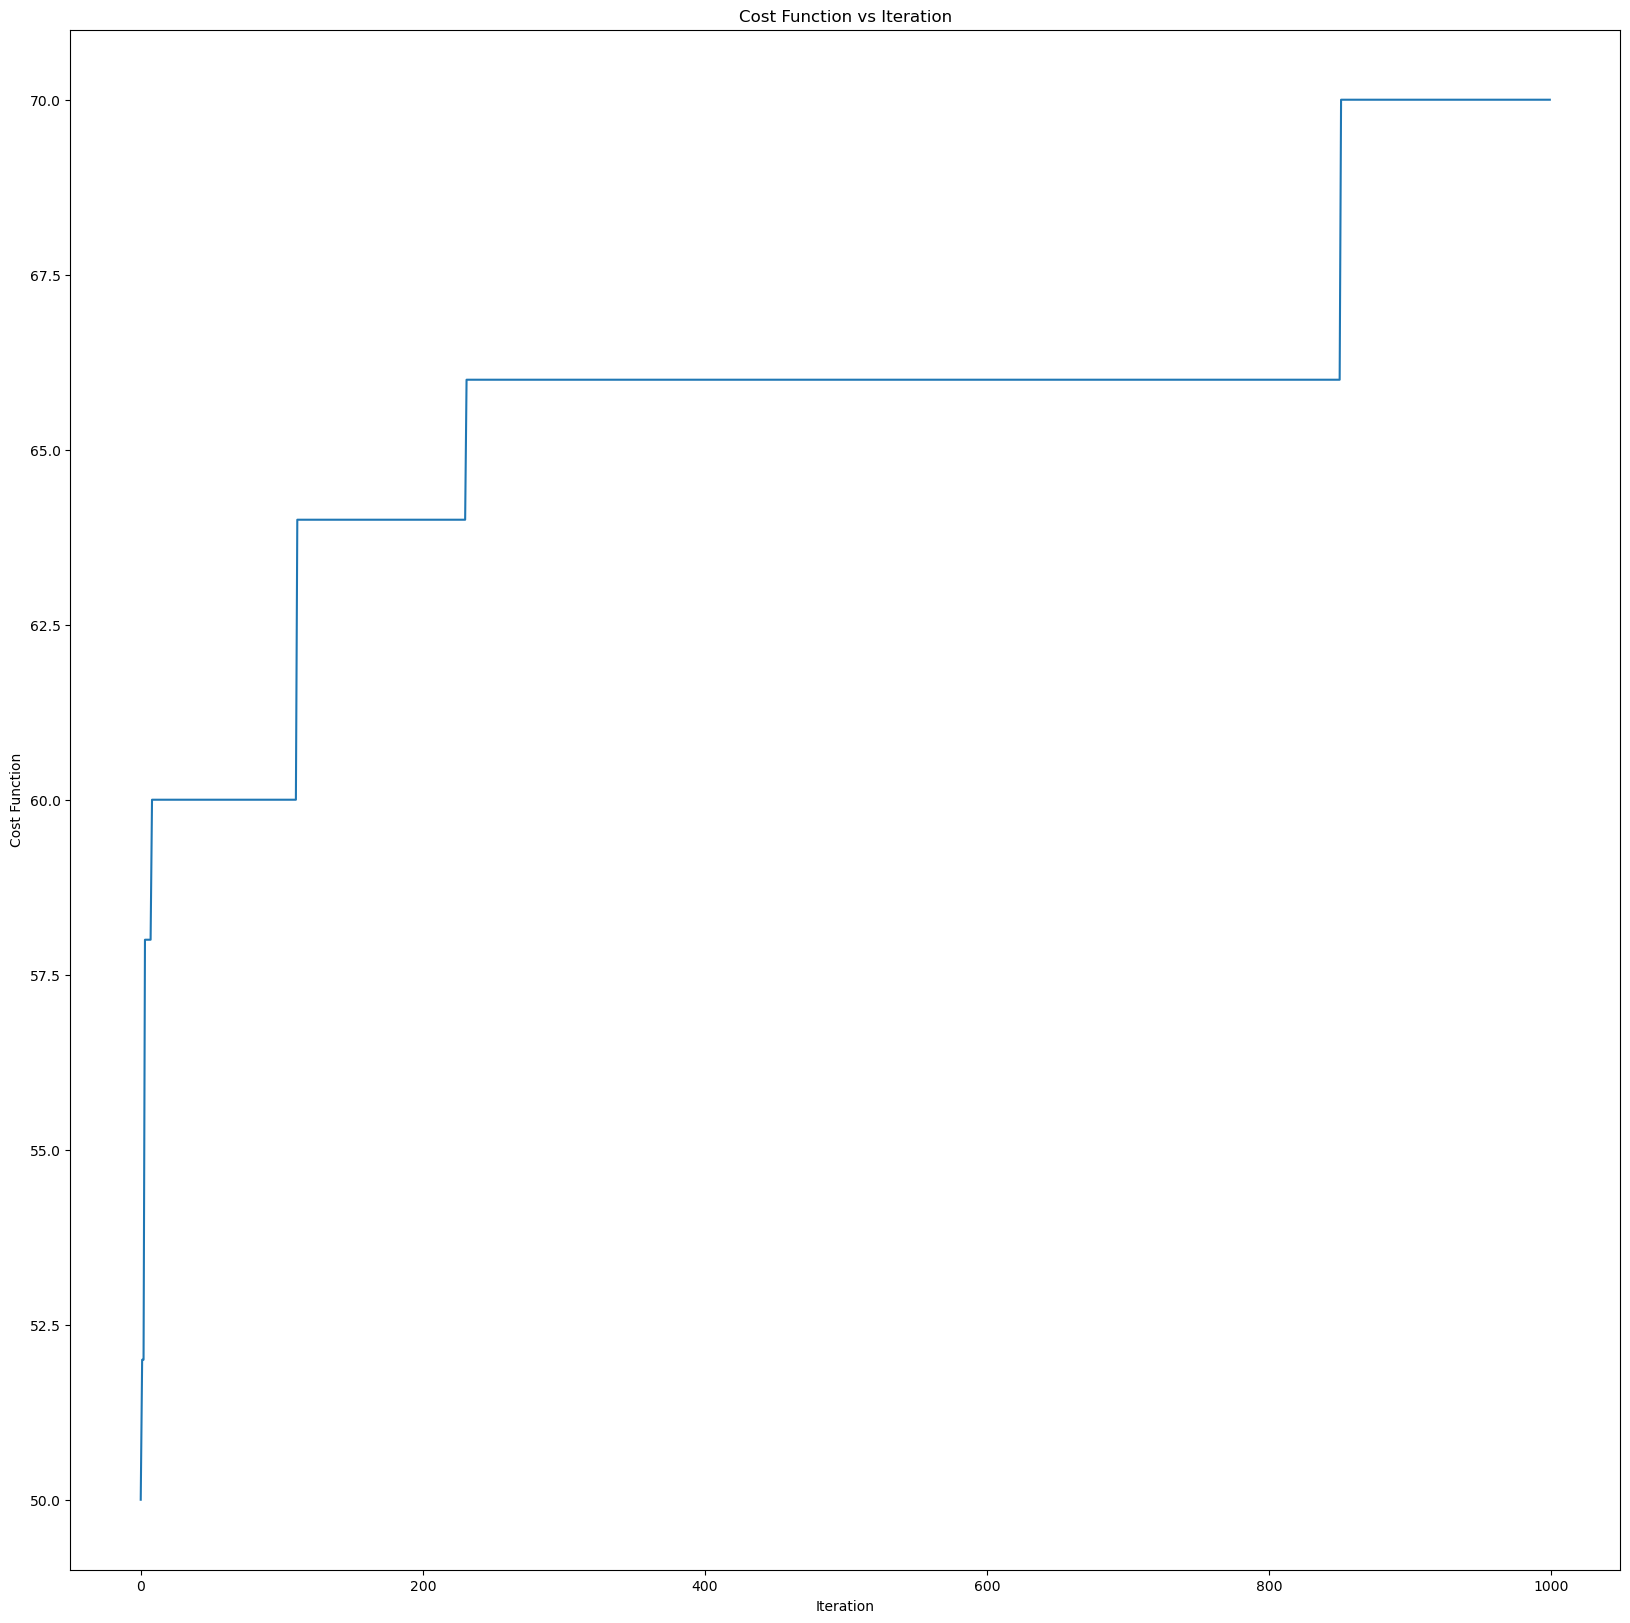

Best Solution:  
 {1: [9, 10, 8, 7, 12, 11, 6, 4, 2, 5], 2: [3, 1]} n Corresponding Cost Function: 70


In [45]:
import numpy as np
import copy
import matplotlib.pyplot as plt

#Initialization Phase
Pheromone_Matrix=np.zeros((12,12))

Random_Matrix=np.ones((12,12))
np.fill_diagonal(Random_Matrix,0)

Index_Matrix=np.zeros([12,12])#To store the index in matrix form to initialize and propagate
Nom_dict={}
idx=1
for i in range(12):#Loop to store Nomenclature and make a list of nomenclature as well
    for j in range(12):
        Nom_dict[idx]=(i+1,j+1)
        Index_Matrix[i][j]=idx
        idx+=1

ants=[]
n_ants=500
def partitioner(Matrix,Index_Matrix):
    n=Matrix.shape[0]
    idx=1
    index=[]
    for i in range(n):#Loop to store Nomenclature and make a list of nomenclature as well
        for j in range(n):
            index.append(idx)
            idx+=1
    probabilities=[]
    for i in range(n):#Loop to create probabilities and custom nom
        for j in range(n):
            probabilities.append(Matrix[i][j]/Matrix.sum())
            idx+=1
    #Randomly picking the Trail
    Index_Trail=np.random.choice(index,1,p=probabilities)#Possibility of selecting one with 0 Trail?
    Index_Trail=int(Index_Trail)
    c=Index_Trail%n
    if c==0:
        r,c=((Index_Trail//n),n)
    else:
        r,c=((Index_Trail//n)+1,Index_Trail%n)
    sensor1,sensor2= Nom_dict[Index_Matrix[r-1][c-1]]
    # print("Sensors Retrieved:",sensor1,sensor2,'\n')
    if((sensor1 not in partition[2]) and (sensor2 not in partition[1]) and((sensor1 not in partition[1]) or (sensor2 not in partition[2]))):
        if(sensor1 in partition[1]):
            partition[2].append(sensor2)
        elif(sensor2 in partition[2]):
            partition[1].append(sensor1)
        else:
            partition[1].append(sensor1)
            partition[2].append(sensor2) 
    # print("Current Status of Partition:",partition,'\n')
while True:
    partition = {1: [], 2: []}
    while True:
        partitioner(Random_Matrix, Index_Matrix)
        if len(partition[1]) + len(partition[2]) == Random_Matrix.shape[0]:
            break

    part1 = sorted(partition[1])
    part2 = sorted(partition[2])
    # Canonical form: smaller goes to partition[1]
    
    if part1 > part2:
        part1, part2 = part2, part1
        normalized_partition = {1: part1, 2: part2}
    normalized_partition = {1: part1, 2: part2}
    # Check if it's a duplicate
    is_duplicate = False
    for existing in ants:
        if normalized_partition == existing:
            is_duplicate = True
            break

    # Add only if it's unique (make deep copy!)
    if not is_duplicate:
        ants.append(copy.deepcopy(normalized_partition))

    if len(ants) == n_ants:
        break
# count=0
# for i in ants:
    # if(len(i[1])==1 or len(i[2])==1):
    #     count+=1
    # print("Partition:",i,'\n')
# print("Count:",count)

def cost_metric(part1, part2):
    s1 = np.sum(part1)
    s2 = np.sum(part2)
    return abs(s1 - s2)
ants_dict={}
for i in range(len(ants)):
    ants_dict[i+1]=ants[i]
for i in ants_dict:
    partition=ants_dict[i]
    cost=cost_metric(partition[1],partition[2])
    for i in partition[1]:
        for j in partition[2]:
            Pheromone_Matrix[i-1][j-1]+=cost
            Pheromone_Matrix[j-1][i-1]+=cost
print("Pheromone Matrix after initial ant pheromone deposits:",Pheromone_Matrix,'\n')
print("Initial ants :",'\n')
for i in ants:
    print (i,'\n')
#Running ACO based on the Initialization
iterations=1000
cost_collection=[]
best_ant_ever_found={}
highest_cost=0
for it in range(iterations):
    Pheromone_Matrix *= 0.75
    ants=[]
    for i in range(n_ants):
        partition = {1: [], 2: []}
        while True:
            partitioner(Pheromone_Matrix, Index_Matrix)
            if len(partition[1]) + len(partition[2]) == Random_Matrix.shape[0]:
                break
        ants.append(partition)
        updation=cost_metric(partition[1],partition[2])
        for i in partition[1]:
            for j in partition[2]:
                Pheromone_Matrix[i-1][j-1]+=updation
                Pheromone_Matrix[j-1][i-1]+=updation
    cost=[]
    for i in range(n_ants):
        cost.append(cost_metric(ants[i][1],ants[i][2]))
    max_cost=max(cost)
    print(it,'\n')
    print(max_cost,'\n')
    if (max_cost>highest_cost):
        highest_cost=max_cost
        best_ant_ever_found=ants[cost.index(max_cost)]
    # cost_collection.append(max_cost)
    cost_collection.append(highest_cost)
    print(best_ant_ever_found,'\n')

plt.figure(figsize=(20, 20))
indices = list(range(len(cost_collection)))
plt.plot(indices,cost_collection)

plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Iteration")

plt.show()
print("Best Solution: ",'\n',best_ant_ever_found,'n',"Corresponding Cost Function:",max(cost_collection))
        
    